# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [58]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [59]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [65]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

X_train, X_dev, y_train, y_dev = train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.25,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [66]:
X.describe()

,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000


## EXTRA FEATURE: Custom spacy textcat

code is commented out as it does not need to run again

In [67]:
#!python -m spacy download en_core_web_lg
from pathlib import Path
from spacy.cli.init_config import init_config
#init_config(lang='en',pipeline=['textcat'],optimize="accuracy", gpu=True).to_disk(Path("base_config.cfg"))

#the config was changed to freeze the tok2vec

In [ ]:
from spacy.tokens import DocBin
import spacy


def to_spacy_file(X, y, file):
    '''
    function converts data into spacy format and saves it to disk

    inputs: x: dataframe, features
            y: series, label
            file: Path

    outputs: none
    '''
    
    docs = DocBin()
    nlp = spacy.blank('en')
    for i, doc in enumerate(nlp.pipe(X['Title'] + '\n' + X['Review Text'])):
        doc.cats = {'Reccommended': y.values[i],
                    'NOT_Reccommended': 1-y.values[i]
                    }
        docs.add(doc)
    docs.to_disk(file)

#to_spacy_file(X_train,y_train,Path("train.spacy"))
#to_spacy_file(X_dev,y_dev,Path("dev.spacy"))
#to_spacy_file(X_test,y_test,Path("test.spacy"))

In [ ]:
#train the spacy model described in config using the gpu
#pip could build the wheel for blis when installing spacy[cuda12x] so i switched to conda
from spacy.cli.train import train
from spacy.cli import evaluate
#spacy.require_gpu()
#train(Path("config.cfg"), overrides={"paths.train": str(Path("train.spacy").resolve()), "paths.dev": str(Path("dev.spacy").resolve())},use_gpu=0,output_path=Path('model/'))
#evaluate(Path('model/model-last'), str(Path("test.spacy").resolve()), use_gpu=0)

ℹ Saving to output directory: model
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'textcat']
ℹ Frozen components: ['tok2vec']
ℹ Set annotations on update for: ['tok2vec']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  CATS_MACRO_F  SCORE 
---  ------  ------------  ----------  ------------  ------
  0       0          0.25       44.87         44.87    0.45
  0     200         36.37       44.87         44.87    0.45
  0     400         31.24       44.87         44.87    0.45
  0     600         32.27       45.28         45.28    0.45
  0     800         23.66       59.27         59.27    0.59
  0    1000         24.49       73.37         73.37    0.73
  0    1200         30.77       68.65         68.65    0.69
  0    1400         23.70       68.84         68.84    0.69
  0    1600         18.62  

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'cats_score': 0.826444107462369,
 'cats_score_desc': 'macro F',
 'cats_micro_p': 0.8964769647696477,
 'cats_micro_r': 0.8964769647696477,
 'cats_micro_f': 0.8964769647696477,
 'cats_macro_p': 0.8195801054267392,
 'cats_macro_r': 0.8339165488148336,
 'cats_macro_f': 0.826444107462369,
 'cats_macro_auc': 0.9404294238757742,
 'cats_f_per_type': {'Reccommended': {'p': 0.9426284189459639,
   'r': 0.9308300395256917,
   'f': 0.9366920782234007},
  'NOT_Reccommended': {'p': 0.6965317919075145,
   'r': 0.7370030581039755,
   'f': 0.7161961367013372}},
 'cats_auc_per_type': {'Reccommended': 0.9404294238757741,
  'NOT_Reccommended': 0.9404294238757742},
 'speed': 173925.72811105452}

## Building Pipeline

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class SpacyClassifier(BaseEstimator, TransformerMixin):

    nlp = spacy.load('model/model-last/')

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([
            [doc.cats['Reccommended']]
            for doc in self.nlp.pipe(X['Title'] + '\n' + X['Review Text'], batch_size=50)
        ])

<h3>Disclaimer</h3>
In the following section I reuse a lot of code from the previous assignment 
Data Scientist Nanodegree Course 4: Data science Pipelines / NLP Pipelines / Exercise: NLP Pipelines

this is because the assignments are very similar and the nature of pipelines is very plug and play resulting in similar code anyway

In [72]:
# analogous to Exercise: NLP Pipelines -- https://www.udacity.com/

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_features = ['Positive Feedback Count', 'Clothing ID', 'Age']
cat_features = ['Division Name', 'Department Name', 'Class Name']
text_features = ['Title', 'Review Text']

num_pipeline = Pipeline([
    (
        'impute',
        SimpleImputer(strategy='most_frequent')
    ),
    (
        'scaler',
        MinMaxScaler(),
    )
])

cat_pipeline = Pipeline([
    (
        'impute',
        SimpleImputer(strategy='most_frequent')
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    )
])

feature_pipe = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('text', SpacyClassifier(), text_features)
])

## Training Pipeline

In [73]:
# analogous to Exercise: NLP Pipelines -- https://www.udacity.com/
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_pipe,
    RandomForestClassifier(random_state=42, max_features='log2', n_estimators=200),
)

model_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
# credit: Exercise: NLP Pipelines -- https://www.udacity.com/
from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8932249322493225


In [75]:
from sklearn.metrics import f1_score,precision_score,recall_score
print('F1 score:', f1_score(y_test, y_pred_forest_pipeline))
print('Precision score:', precision_score(y_test, y_pred_forest_pipeline))
print('Recall score:', recall_score(y_test, y_pred_forest_pipeline))

F1 score: 0.9348760330578513
Precision score: 0.9382879893828799
Recall score: 0.9314888010540184


## Fine-Tuning Pipeline

In [76]:
# doing cross validation and hyperparameter tuning on the SpacyClassifier is too resource intensive and out of scope
# when building such a pipeline, the spacy classifier could recieve losses from the random forest to increase accuracy further


# analogous to Exercise: NLP Pipelines -- https://www.udacity.com/
from sklearn.model_selection import GridSearchCV

my_distributions = dict(
    randomforestclassifier__max_features=[
        'sqrt',
        'log2'
    ],
    randomforestclassifier__n_estimators=[
        150,
        200,
    ],
)

param_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=my_distributions,
    cv=4,         # Use 4-fold cross-validation
    n_jobs=1,    # usignd multi ple processes results in pickling errors
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
)

param_search.fit(X_dev, y_dev)

# Retrieve the best parameters
param_search.best_params_

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=150;, score=0.899 total time=   2.4s
[CV 2/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=150;, score=0.888 total time=   2.4s
[CV 3/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=150;, score=0.906 total time=   2.5s
[CV 4/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=150;, score=0.879 total time=   2.4s
[CV 1/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.897 total time=   2.5s
[CV 2/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.890 total time=   2.5s
[CV 3/4] END randomforestclassifier__max_features=sqrt, randomforestclassifier__n_estimators=200;, score=0.905 total time=   2.4s
[CV 4/4] END randomforestclass

{'randomforestclassifier__max_features': 'log2',
 'randomforestclassifier__n_estimators': 200}

In [77]:
# credit: Exercise: NLP Pipelines -- https://www.udacity.com/
model_best = param_search.best_estimator_
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8943089430894309


In [78]:
#calculate classification report for the best model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_forest_pipeline, target_names=['NOT_Reccommended', 'Reccommended']))

                  precision    recall  f1-score   support

NOT_Reccommended       0.72      0.67      0.69       327
    Reccommended       0.93      0.94      0.94      1518

        accuracy                           0.89      1845
       macro avg       0.82      0.81      0.81      1845
    weighted avg       0.89      0.89      0.89      1845



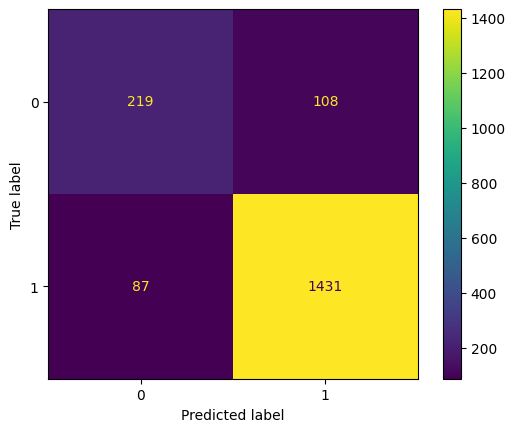

In [81]:
#show confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_best, X_test, y_test)